# Stockholder-Company Network

共2625285行，记录了当前的股东关系网络

| Field         | Type         | Null | Key | Default | Note |
|---------------|--------------|------|-----|---------|-------|
| stock_id      | int(11)      | YES  |     | <null>  |股东id（注意是单独id) |
| corp_id       | int(15)      | YES  |     | <null>  |企业id|
| gudong        | varchar(225) | YES  |     | <null>  |股东名称|
| gudongleixing | varchar(225) | YES  |     | <null>  |股东类型|
| investor_id   | int(11)      | YES  |     | <null>  |股东对应的企业id|
| investor_name | varchar(256) | YES  |     | <null>  |对应的企业名称（存在改名的情况，所以不一定与gudong相等）|
    
investorname和gudong是一个信息，前者是标准的库里名称。

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv('/Users/datalab/bigdata/business_shareholder/business_shareholder.csv', 
                names = ['sh_id', 'enterprise_id', 'sh_name', 'sh_type', 'sh_company_id', 'sh_company_name'])
df.head()

,sh_id,enterprise_id,sh_name,sh_type,sh_company_id,sh_company_name
0,14364739,13929672,抚顺钢铁公司,法人股东,21337265,抚顺钢铁公司
1,9700478,9437006,抚顺钢铁公司,企业法人,21337265,抚顺钢铁公司
2,250359,250869,抚顺钢铁公司,企业法人,21337265,抚顺钢铁公司
3,14707611,14257867,抚顺钢铁公司,企业法人,21337265,抚顺钢铁公司
4,27493957,26576036,抚顺钢铁公司,企业法人,21337265,抚顺钢铁公司


In [13]:
len(df)

2625285

# Economic Complexity index

In [82]:
from ECI2 import *
import scipy.sparse.linalg 
import scipy
from scipy import sparse

In [80]:
x = list(df["sh_id"])
y = list(df["enterprise_id"])
#data = np.array(list(df_year["export_value"]))
sx = list(set(x))
sy =list(set(y))
dx = dict(zip(sx,range(len(sx))))
dy = dict(zip(sy,range(len(sy))))
x1 = [dx[xi] for xi in x]
y1 = [dy[yi] for yi in y]

In [83]:
data = np.array([1 for i in x])

In [84]:
len(y1), len(x), len(data)

(2625285, 2625285, 2625285)

In [85]:
M = sparse.csc_matrix((data,(x1,y1)),(len(dx),len(dy)))

In [86]:
M.shape

(2605950, 1983342)

In [ ]:
R = RCA_sparse(M)

## Co-investment network

In [78]:
df[df['enterprise_id']==13929672]

,sh_id,enterprise_id,sh_name,sh_type,sh_company_id,sh_company_name
0,14364739,13929672,抚顺钢铁公司,法人股东,21337265,抚顺钢铁公司
896021,14364736,13929672,辽宁信托投资公司,法人股东,37158655,辽宁信托投资公司
1940792,14364743,13929672,本溪实业开发股份有限公司,法人股东,12587706,本溪实业开发股份有限公司
2461312,14364734,13929672,辽宁科联实业集团,法人股东,30731274,辽宁省老科技工作者活动中心
2461337,14364735,13929672,辽宁能源总公司,法人股东,55469595,辽宁能源投资（集团）有限责任公司


## 股东的公司改名情况

In [17]:
dat = df[df['sh_name'] != df['sh_company_name']]
len(dat)

97495

In [27]:
dat = dat[pd.isna(dat['sh_name']) == False]
len(dat)

97324

In [28]:
dat.head()

,sh_id,enterprise_id,sh_name,sh_type,sh_company_id,sh_company_name
16287,42122809,40587198,aaaa,企业法人,2481805,AAAA
16288,27741343,26814131,aaaa,企业法人,2481805,AAAA
16289,52389488,50359492,AAAA,企业法人,24756576,aaaa
24395,21032189,20346686,XXXX,其他投资者,3625852,xxxx
24396,22018428,21297375,XXXX,其他投资者,3625852,xxxx


In [29]:
dat.tail()

,sh_id,enterprise_id,sh_name,sh_type,sh_company_id,sh_company_name
2625222,10991558,10685404,诸暨上峰水泥有限公司,法人股东,3363086,诸暨小峰机械有限公司
2625265,12596839,12228538,辽宁无线电二厂（集团）,企业法人,49856284,大连辽无二电器有限公司
2625266,4101250,3998578,辽宁无线电二厂（集团）,其他投资者,49856284,大连辽无二电器有限公司
2625267,9859489,9590952,沈阳黎明高级服装厂（集团）,其他投资者,45583537,沈阳黎明服装集团公司
2625284,16497211,15971342,杭州师范学院附属工厂,企业法人,25229986,杭州师范大学附属工厂


法人股东亦称单位股东，是指以公司或集团(机构)名义占有其他企业股份的股东。

## stockholder's types

In [14]:
df['sh_type'].unique()

array(['法人股东', '企业法人', '有限公司(自然人独资)', '其他投资者', '其他非自然人投资者', '全民所有制', '法人',
       '社团法人', '主管单位', '集体所有制(股份合作制)', '有限公司', '其他企业法人', '集体所有制',
       '有限公司(国有独资)', '其他股东', '有限责任公司(中外合资)', '有限公司(自然人控股)', '内资企业法人', '1',
       '外国(地区)企业', '国有企业', '其他', '股份有限公司(自然人控股)', '有限合伙人',
       '集体所有制(股份合作制-股份制)', '企业', '股份有限公司', '外商投资企业', '联营', '个人独资', '合伙企业',
       '集体所有制(合作制)', '有限公司(法人独资)内资', '普通合伙企业', '国家授权投资部门',
       '有限责任公司(台港澳与境内合资)', '中方（承料方）', '香港企业', '外国企业', '子公司',
       '有限责任公司(外国法人独资)', '内资合伙企业', '外国(地区)投资者', '外国投资者', '外国(地区)经济组织',
       '其它', '集体企业', '企业法人（全民所有制）', '国家授权投资机构', '有限公司(法人独资)私营', '普通合伙人',
       '股份有限公司(上市)', '有限责任', '有限责任公司(台港澳法人独资)', '外商投资投资性公司',
       '股份有限公司(中外合资，未上市)', '参股公司', '股份有限公司(台港澳与境内合资，上市)',
       '股份有限公司(台港澳与境内合资，未上市)', '外国（地区）投资者', '有限责任公司', '有限合伙企业', '港澳台投资者',
       '母公司', '股份有限公司(中外合资，上市)', '外商投资创业投资企业', '特殊的普通合伙企业', '外商投资合伙企业',
       '本地企业', '有限责任公司(中外合作)', '台湾企业', '有限责任公司(台港澳与境内合作)',
       '股份有限公司(上市,自然人控股)', '全名所有制', '公司', '有限责任公司(外国自然人独资)',
 

In [73]:
pd.DataFrame(df["sh_type"].value_counts(normalize = True))[:10]

,sh_type
企业法人,0.641456
法人股东,0.209559
其他投资者,0.032281
有限公司,0.029681
有限公司(自然人控股),0.022290
合伙企业,0.009337
其他非自然人投资者,0.004862
有限公司(法人独资)内资,0.004332
外商投资企业,0.003787
集体所有制,0.003155


In [53]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 

In [55]:
types[:10]

['企业法人',
 '法人股东',
 '其他投资者',
 '有限公司',
 '有限公司(自然人控股)',
 '合伙企业',
 '其他非自然人投资者',
 '有限公司(法人独资)内资',
 '外商投资企业',
 '集体所有制']

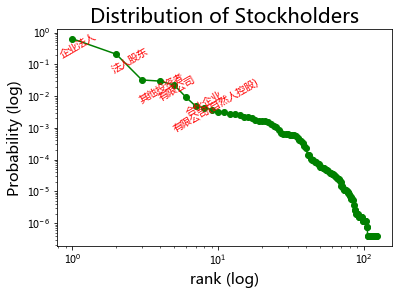

In [77]:
types = df["sh_type"].value_counts(normalize = True).index.tolist()
count = df["sh_type"].value_counts(normalize = True).tolist()
rank = range(1, len(count)+1)

plt.plot(rank, count, 'g-o')
for k, i in enumerate(rank[:6]):
    plt.text(i-0.2, count[k], types[k], fontsize = 10, 
                 color = 'red', rotation = 30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rank (log)', fontsize = 15)
plt.ylabel('Probability (log)', fontsize = 15)
plt.title('Distribution of Stockholders', fontsize = 20)
plt.show()

# More info

business_entrytrend.csv

共59179961 行，记录企业的基本信息



| Field            | Type         | Null | Key | Default | Note
|------------:|:--------------:|:------:|:----:|:----:|-------:|
| id               | int(11)      | NO   | MUL | 0       |企业id |
| type2            | varchar(90)  | YES  |     | <null>  |企业注册类型：国有企业、集体企业|
| fivekm           | int(1)       | YES  | MUL | <null>  |是否在县域边界5km以内|
| tenkm            | int(1)       | YES  | MUL | <null>  |是否在县域边界10km以内|
| city             | varchar(255) | YES  | MUL | <null>  |城市|
| citycode         | varchar(45)  | YES  |     | <null>  |城市代码|
| district         | varchar(255) | YES  |     | <null>  |县区|
| adcode           | varchar(45)  | YES  |     | <null>  |县区代码|
| suoshuhangye     | varchar(50)  | YES  | MUL | <null>  |所在一级行业|
| status           | varchar(128) | YES  | MUL | <null>  |当前状态，直接用closed|
| entryyear        | int(11)      | YES  | MUL | <null>  |注册年|
| exityear         | int(6)       | YES  | MUL | <null>  |注销年|
| closed           | int(1)       | YES  | MUL | <null>  |是否关闭|
| industry         | int(2)       | YES  |     | <null>  |制造业企业的2级行业|
| entrymonth       | varchar(2)   | YES  |     | <null>  |注册月份|
| exitmonth        | varchar(2)   | YES  |     | <null>  |注销月份|
| death_3y         | varchar(2)   | YES  |     | 0       |是否存续超过3年|
| lifelong         | int(2)       | YES  |     | <null>  |存续时间|
| regcapital       | double       | YES  | MUL | <null>  |注册资本(万)|
| vc_5y            | int(1)       | YES  |     | <null>  |成立五年内是否获得风投或ipo，可以作为增长的一个指标|
| patent_1y        | int(1)       | YES  | MUL | <null>  |成立一年内是否申请发明专利|
| firstpatent_year | int(4)       | YES  | MUL | <null>  |第一个发明专利的申请年|
